<a href="https://colab.research.google.com/github/alondralezfra/AIML-Depression-Analysis/blob/main/LogisticRegressionTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = 'https://raw.githubusercontent.com/peilutu/AIML_HeartAttackPrediction/refs/heads/main/depression_data.csv'
depression_data = pd.read_csv(file_path)

# Data Cleaning and Encoding
columns_to_drop = ['Name']  # Name is an unnecessary column
depression_data_cleaned = depression_data.drop(columns=columns_to_drop, axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = [
    'Marital Status',
    'Education Level',
    'Smoking Status',
    'Physical Activity Level',
    'Employment Status',
    'Alcohol Consumption',
    'Dietary Habits',
    'Sleep Patterns',
    'History of Mental Illness',
    'History of Substance Abuse',
    'Family History of Depression',
    'Chronic Medical Conditions',
]

for column in categorical_columns:
    depression_data_cleaned[column] = label_encoder.fit_transform(depression_data_cleaned[column])

# Define features and target
X = depression_data_cleaned.drop('History of Mental Illness', axis=1)
y = depression_data_cleaned['History of Mental Illness']

Train Accuracy: 0.6518705112591858
Test Accuracy: 0.6512238490817659


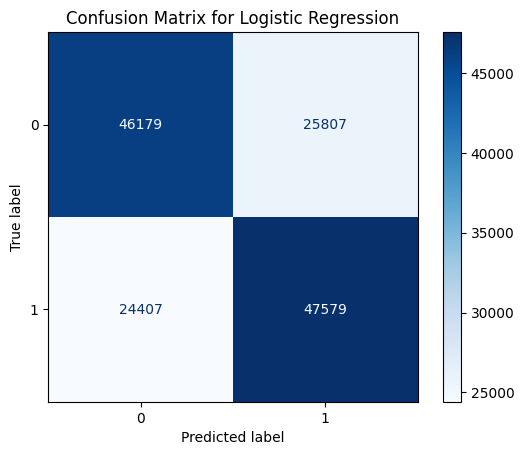

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     71986
           1       0.65      0.66      0.65     71986

    accuracy                           0.65    143972
   macro avg       0.65      0.65      0.65    143972
weighted avg       0.65      0.65      0.65    143972



In [ ]:
from imblearn.over_sampling import SMOTE

# Perform oversampling on the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) #X_train, y_train (what Peilu did)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

# Train Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on train and test data
lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

# Calculate train and test accuracies
train_accuracy = accuracy_score(y_train, lr_y_train_pred)
test_accuracy = accuracy_score(y_test, lr_y_test_pred)

# Display train and test accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Display classification report
classification_report_text = classification_report(y_test, lr_y_test_pred)
print("Classification Report:\n", classification_report_text)

Train Accuracy: 0.6518982945679
Test Accuracy: 0.6512655238518601
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     71986
           1       0.65      0.66      0.65     71986

    accuracy                           0.65    143972
   macro avg       0.65      0.65      0.65    143972
weighted avg       0.65      0.65      0.65    143972



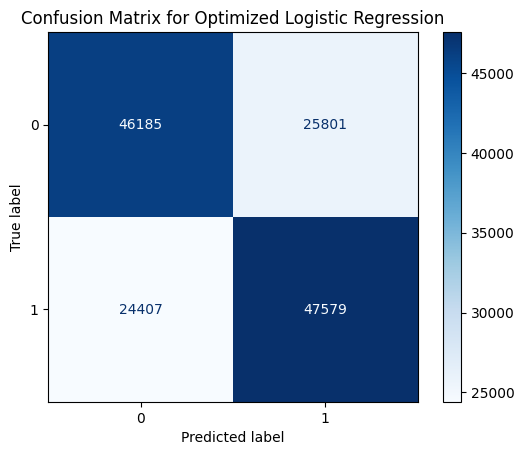

In [ ]:
# Training and Testing tuned Logistic Regression Model
# Best Parameters: {'C': 1, 'class_weight': None, 'solver': 'saga'}

best_lr_model = LogisticRegression(C=1, solver='saga', class_weight=None, max_iter=5000, random_state=42)
best_lr_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Classification report
classification_report_text = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_report_text)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_lr_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Optimized Logistic Regression")
plt.show()

**Tuned Logistic Regression model did not improve**



*   We might have hit the maximum performance capacity of Logistic Regression already so tuning hyperparameters does not affect
*   If features don't have a clear linear relationship with target variable, we can attempt feature engineering



Applying Interaction Features...
Train Accuracy: 0.6621225521747385
Test Accuracy: 0.6625802239324313
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68     71986
           1       0.68      0.61      0.64     71986

    accuracy                           0.66    143972
   macro avg       0.66      0.66      0.66    143972
weighted avg       0.66      0.66      0.66    143972



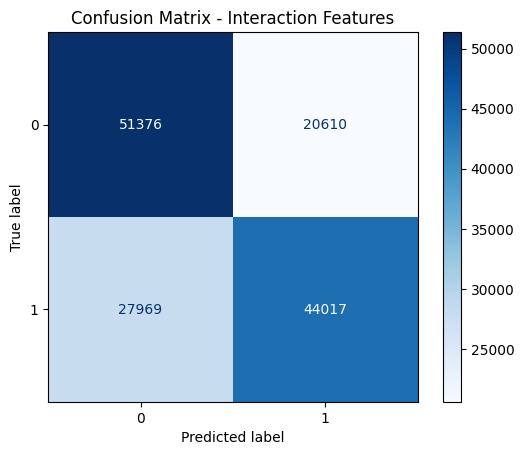

Applying Binning Features...
Train Accuracy: 0.652680857763351
Test Accuracy: 0.651612813602645
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     71986
           1       0.65      0.66      0.65     71986

    accuracy                           0.65    143972
   macro avg       0.65      0.65      0.65    143972
weighted avg       0.65      0.65      0.65    143972



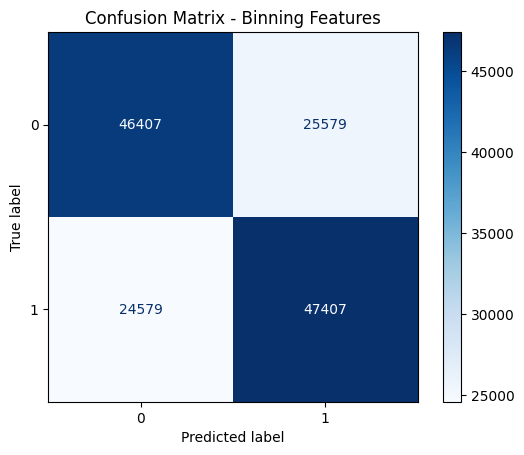

Transformation: Interaction Features
Train Accuracy: 0.6621225521747385
Test Accuracy: 0.6625802239324313
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68     71986
           1       0.68      0.61      0.64     71986

    accuracy                           0.66    143972
   macro avg       0.66      0.66      0.66    143972
weighted avg       0.66      0.66      0.66    143972

--------------------------------------------------
Transformation: Binning Features
Train Accuracy: 0.652680857763351
Test Accuracy: 0.651612813602645
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     71986
           1       0.65      0.66      0.65     71986

    accuracy                           0.65    143972
   macro avg       0.65      0.65      0.65    143972
weighted avg       0.65      0.65      0.65    143972

-----------------------------------------

In [ ]:
# Feature Engineering pt 1
# Correlated features and binning features

from sklearn.preprocessing import PolynomialFeatures

# Define transformations
transformations = {
    "Interaction Features": PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    "Binning Features": "binning"
}

# Define bins for continuous features (Age and Income)
binning_params = {
    "Age": [18, 33, 49, 65, 80],
    "Income": [0, 21001, 37520, 76616, 209996]
}

results = []

for transformation_name, transformer in transformations.items():
    print(f"Applying {transformation_name}...")

    if transformation_name == "Binning Features":
        column_names = list(depression_data_cleaned.drop('History of Mental Illness', axis=1).columns)
        X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)
        X_train_transformed = pd.DataFrame(X_train_unscaled, columns=column_names)
        X_test_transformed = pd.DataFrame(X_test_unscaled, columns=column_names)

        for col, bins in binning_params.items():
            # Apply binning for each column
            X_train_transformed[col] = pd.cut(X_train_transformed[col], bins=bins, labels=False, include_lowest=True)
            X_test_transformed[col] = pd.cut(X_test_transformed[col], bins=bins, labels=False, include_lowest=True)

        # Scale after binning
        X_train_scaled = scaler.fit_transform(X_train_transformed)
        X_test_scaled = scaler.transform(X_test_transformed)

    else:
        # Apply PolynomialFeatures transformation
        X_train_transformed = transformer.fit_transform(X_train)
        X_test_transformed = transformer.transform(X_test)

    best_lr_model.fit(X_train_transformed, y_train)

    y_train_pred = best_lr_model.predict(X_train_transformed)
    y_test_pred = best_lr_model.predict(X_test_transformed)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_report_text = classification_report(y_test, y_test_pred)

    results.append({
        "Transformation": transformation_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Classification Report": classification_report_text
    })

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("Classification Report:\n", classification_report_text)

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {transformation_name}")
    plt.show()

# Display all results
for result in results:
    print(f"Transformation: {result['Transformation']}")
    print(f"Train Accuracy: {result['Train Accuracy']}")
    print(f"Test Accuracy: {result['Test Accuracy']}")
    print("Classification Report:\n", result["Classification Report"])
    print("-" * 50)


**Slight improvement after applying interaction features engineering**


*   test accuracy is 0.66, slight improvement
*   
*   We could try further engineering such as different degrees for polynomial features
*   But instead we move onto another model since logistic regression does not show significant improvement after hyperparameter tuning nor feature engineering



In [ ]:
# Feature Engineering pt 2: Removing irrelevant/highly correlated features

# Correlation heatmaps, variance inflation factor, recursive feature elimination